<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Hatim Sawai</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300108</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 4</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../docs/pledge.jpg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      <strong>Dealing with Time Series Data :</strong>
      <br>
      1. Resample a time series to a different time frequency (eg. Daily, monthly). One up sampling and one down sampling and OHLC sampling required to be done
      <br>
      2. Shift a time series forward and backward in time. Use naive shifts, and shift using frequency
      <br>
      3. Compute moving averages or rolling sums over a time series. Apply 3 moving window functions to your dataset
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">THEORY</td>
    <td class="tg-0pky col2">
    <strong>I. Resampling Time Series Data:</strong>

**Aim:** Change the frequency of data points in a time series.
<br>**Types:**
<br>* **Upsampling:** Increase frequency (e.g., daily to hourly).
<br>* **Downsampling:** Decrease frequency (e.g., hourly to monthly).
<br>**Methods:**
<br>**Upsampling:**
<br>* **Forward fill (FFill):** Fill missing values with the last available value.
<br>* **Linear interpolation:** Estimate missing values by interpolating between existing points.
<br>**Downsampling:**
<br>* **Mean:** Average values within the chosen period.
<br>* **Median:** Choose the middle value within the period.
<br>* **OHLC (Open-High-Low-Close):** Summarize the period with opening, highest, lowest, and closing values.
<br>**Choice of method:** Depends on data characteristics and research question.
<br>**For your experiment:** Using `interpolate()` for upsampling might be better than FFill because it captures potential trends between data points, offering a more nuanced representation.

<strong>2. Shifting Time Series Data:</strong>

**Aim:** Move data points forward or backward in time.
<br>**Types:**
<br>* **Naive shift:** Shift all data points by the same fixed amount (e.g., 1 day forward).
<br>* **Shift using frequency:** Shift data points according to the chosen frequency (e.g., shift daily data by 3 days).
<br>**Application:** Align time series for comparison, model future values, simulate delays.

<strong>3. Moving Averages/Rolling Sums:</strong>

**Aim:** Smooth out fluctuations and capture underlying trends in time series data.
<br>**Types:**
<br>* **Simple moving average (SMA):** Average values within a specified window.
<br>* **Exponential moving average (EMA):** Weights recent values more heavily, giving more importance to recent trends.
<br>* **Weighted moving average (WMA):** Assigns custom weights to values within the window.
<br>**Choice of method:** Depends on desired level of smoothing and sensitivity to recent trends.
    </td>
  </tr>
</tbody>
</table> 

<div style="page-break-before: always;"></div>

### 1. Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read csv file
df = pd.read_csv('../Datasets/trends_musicians.csv')
df.head()

,Week,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
0,2010-01-10,13,8,13,10,8
1,2010-01-17,15,9,14,6,7
2,2010-01-24,15,9,14,7,7
3,2010-01-31,30,13,17,11,7
4,2010-02-07,16,9,17,8,8


<div style="page-break-before: always;"></div>

### 2. Resampling Time Series Data

In [2]:
# Convert the date index to datetime
df['Week'] = pd.to_datetime(df['Week'])
df.set_index('Week', inplace=True)
df.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-10,13,8,13,10,8
2010-01-17,15,9,14,6,7
2010-01-24,15,9,14,7,7
2010-01-31,30,13,17,11,7
2010-02-07,16,9,17,8,8


In [4]:
# Downsample to monthly frequency using mean
df_monthly = df.resample('M').mean()
df_monthly.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-31,18.25,9.75,14.50,8.50,7.25
2010-02-28,13.25,9.50,21.75,7.50,7.50
2010-03-31,10.00,13.50,38.00,7.25,7.25
2010-04-30,9.50,13.75,42.75,10.25,6.75
2010-05-31,9.20,19.20,40.40,18.00,6.40


In [6]:
# Upsample to daily frequency using forward fill (ffill)
df_daily = df.resample('D').ffill()
df_daily.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-10,13,8,13,10,8
2010-01-11,13,8,13,10,8
2010-01-12,13,8,13,10,8
2010-01-13,13,8,13,10,8
2010-01-14,13,8,13,10,8


In [7]:
# Upsample to daily using interpolation
df_interpolated = df.resample('D').interpolate()
df_interpolated.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-10,13.000000,8.000000,13.000000,10.000000,8.000000
2010-01-11,13.285714,8.142857,13.142857,9.428571,7.857143
2010-01-12,13.571429,8.285714,13.285714,8.857143,7.714286
2010-01-13,13.857143,8.428571,13.428571,8.285714,7.571429
2010-01-14,14.142857,8.571429,13.571429,7.714286,7.428571


In [9]:
# use ohlc method on monthly data
df_ohlc = df.resample('M').ohlc()
df_ohlc.head()

Taylor Swift                Drake                Justin Bieber  \
                   open high low close  open high low close          open   
Week                                                                        
2010-01-31           13   30  13    30     8   13   8    13            13   
2010-02-28           16   16  11    12     9   11   8    11            17   
2010-03-31           11   11   9    10    13   15  13    13            26   
2010-04-30            8   10   8    10    12   15  12    14            48   
2010-05-31            9   10   9     9    15   24  15    24            39   

                          Eminem                Selena Gomez                 
           high low close   open high low close         open high low close  
Week                                                                         
2010-01-31   17  13    17     10   11   6    11            8    8   7     7  
2010-02-28   26  17    26      8    8   7     7            8    8   7     7  
2010-03-31   51  26    51      7    8   7     7            7    8   7     8  
2010-04-30   48  38    39      7   18   7    18            8    8   6     6  
2010-05-31   45  35    35     20   21  16    16            7    7   6     6

### 3. Shifting Time Series Data

In [10]:
# shift the data using naive method
df_shifted = df.shift(2)
df_shifted.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-10,NaN,NaN,NaN,NaN,NaN
2010-01-17,NaN,NaN,NaN,NaN,NaN
2010-01-24,13.0,8.0,13.0,10.0,8.0
2010-01-31,15.0,9.0,14.0,6.0,7.0
2010-02-07,15.0,9.0,14.0,7.0,7.0


In [11]:
# shift the data foward using freq
df_shifted = df.shift(2, freq='D')
df_shifted.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2010-01-12,13,8,13,10,8
2010-01-19,15,9,14,6,7
2010-01-26,15,9,14,7,7
2010-02-02,30,13,17,11,7
2010-02-09,16,9,17,8,8


In [12]:
# shift the data backward using freq
df_shifted = df.shift(-2, freq='W')
df_shifted.head()

,Taylor Swift,Drake,Justin Bieber,Eminem,Selena Gomez
Week,,,,,
2009-12-27,13,8,13,10,8
2010-01-03,15,9,14,6,7
2010-01-10,15,9,14,7,7
2010-01-17,30,13,17,11,7
2010-01-24,16,9,17,8,8


<div style="page-break-before: always;"></div>

### 4. Moving Averages

In [13]:
# Apply 3 moving window functions to your dataset
rolling_mean_7 = df.rolling(window=7).mean()
rolling_sum_14 = df.rolling(window=14).sum()
rolling_expanding_mean = df.expanding().mean()


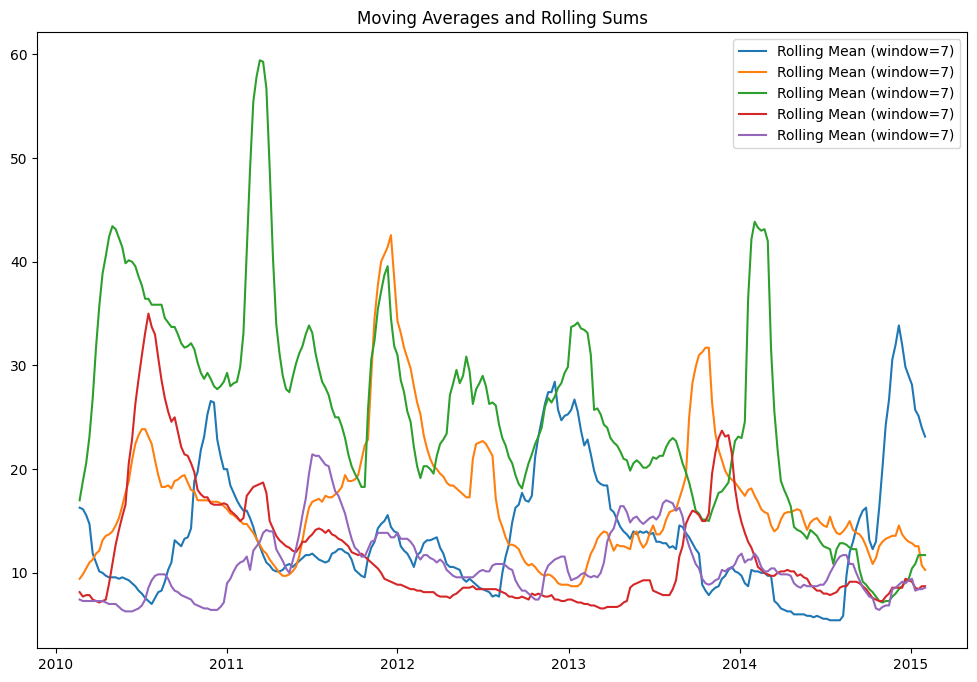

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(rolling_mean_7, label='Rolling Mean (window=7)')
# plt.plot(rolling_sum_14, label='Rolling Sum (window=14)')
# plt.plot(rolling_expanding_mean, label='Expanding Mean')
plt.legend()
plt.title('Moving Averages and Rolling Sums')
plt.show()

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">In this experiment we learned about resampling, shifting and moving averages of time series data. We learned how to change the frequency of data points in a time series, move data points forward or backward in time and smooth out fluctuations and capture underlying trends in time series data. We also learned about the different methods of resampling, shifting and moving averages and their applications. We also implemented these methods on a dataset and observed the changes in the dataset after applying these methods.</td>
    </td>
  </tr>
</tbody>
</table> 